# Crop Yield Prediction Using XGBoost and Random Forest

This notebook demonstrates a machine learning approach to predict crop yields using XGBoost and Random Forest models. The code has been refactored into modular functions for better organization and reusability.

## Code Organization:
1. Data Loading and Analysis
2. Data Visualization
3. Model Training and Evaluation
4. Model Saving

Each section is organized into functions with proper documentation and error handling.

In [1]:
# Install required packages if not already installed
import sys
import subprocess

def install_packages():
    required_packages = [
        'numpy',
        'pandas',
        'matplotlib',
        'seaborn',
        'scikit-learn',
        'xgboost',
        'joblib'
    ]
    
    for package in required_packages:
        try:
            __import__(package)
            print(f"✅ {package} is already installed")
        except ImportError:
            print(f"📦 Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully")

install_packages()

✅ numpy is already installed
✅ pandas is already installed
✅ pandas is already installed
✅ matplotlib is already installed
✅ matplotlib is already installed
✅ seaborn is already installed
📦 Installing scikit-learn...
✅ seaborn is already installed
📦 Installing scikit-learn...
✅ scikit-learn installed successfully
✅ scikit-learn installed successfully
✅ xgboost is already installed
✅ joblib is already installed
✅ xgboost is already installed
✅ joblib is already installed


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import joblib

In [3]:
def load_data(file_path):
    """
    Load and prepare the dataset
    Args:
        file_path (str): Path to the CSV file
    Returns:
        pd.DataFrame: Loaded and processed dataframe
    """
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        print("\nFirst 10 rows of the data:")
        print(data.head(10))
        return data
    except FileNotFoundError:
        print(f"Error: File {file_path} not found!")
        return None
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

# Load the data
data = load_data("yield_df.csv")

Data loaded successfully!

First 10 rows of the data:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   
5           5  Albania        Wheat  1990        30197   
6           6  Albania        Maize  1991        29068   
7           7  Albania     Potatoes  1991        77818   
8           8  Albania  Rice, paddy  1991        28538   
9           9  Albania      Sorghum  1991         6667   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0

In [4]:
def analyze_data(df):
    """
    Analyze the dataset and display basic information and statistics
    Args:
        df (pd.DataFrame): Input dataframe
    Returns:
        tuple: DataFrame info and description
    """
    print("Dataset Analysis:")
    print("\n1. Basic Information:")
    info = df.info()
    
    print("\n2. Descriptive Statistics:")
    description = df.describe(include='all')
    
    return info, description

# Analyze the data
info, description = analyze_data(data)

Dataset Analysis:

1. Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB

2. Descriptive Statistics:


C:\Users\n7205\AppData\Local\Temp\ipykernel_9888\1797859523.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')


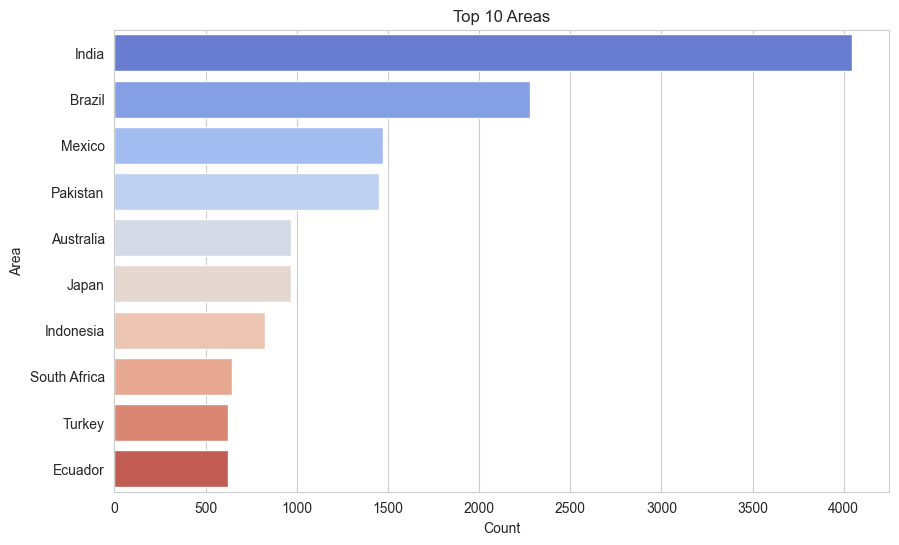

C:\Users\n7205\AppData\Local\Temp\ipykernel_9888\1797859523.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')


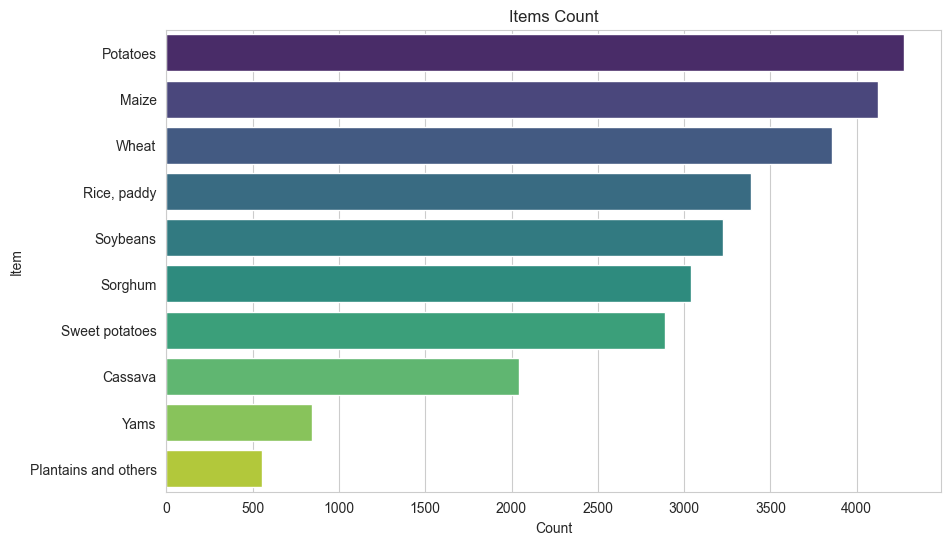

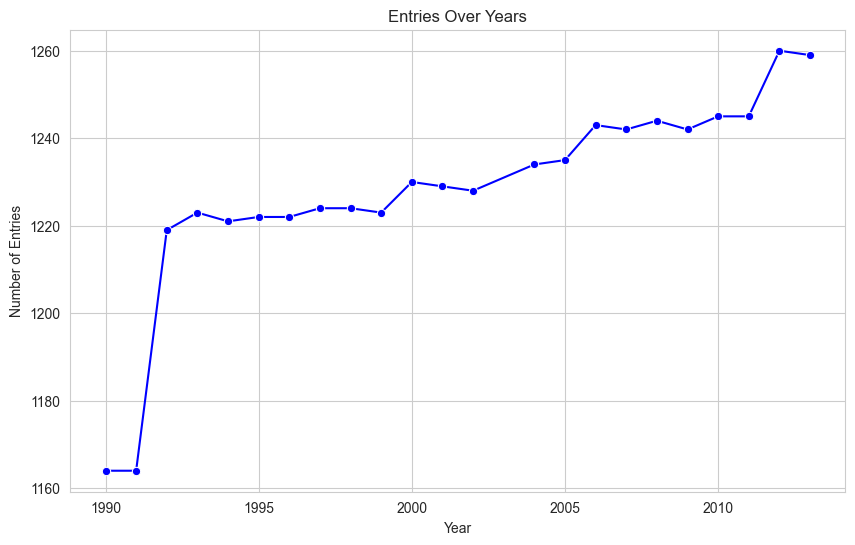

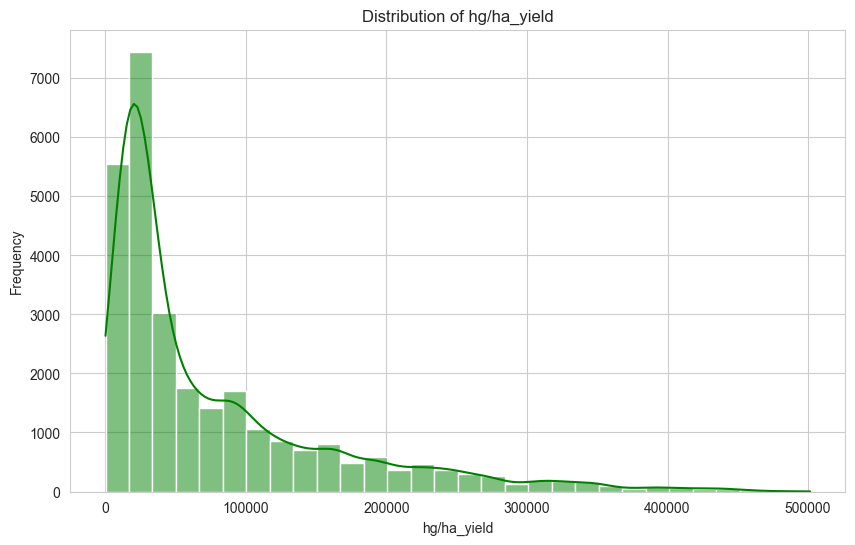

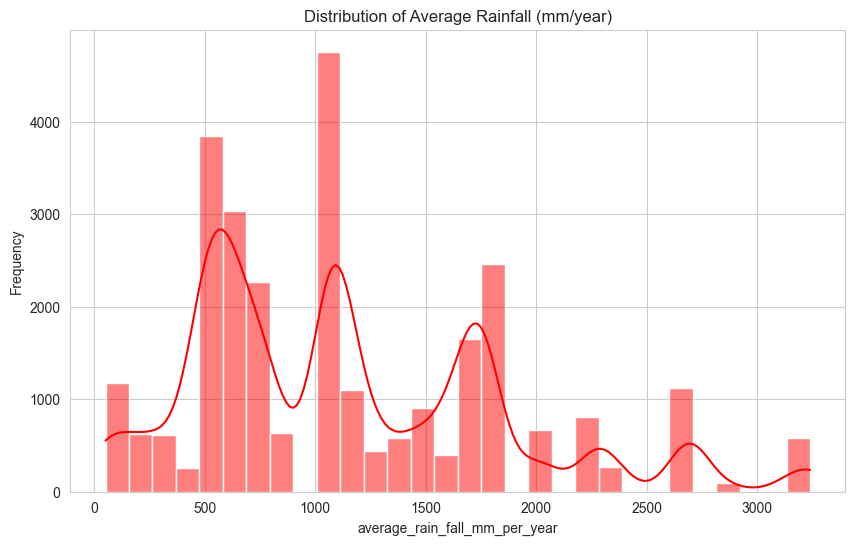

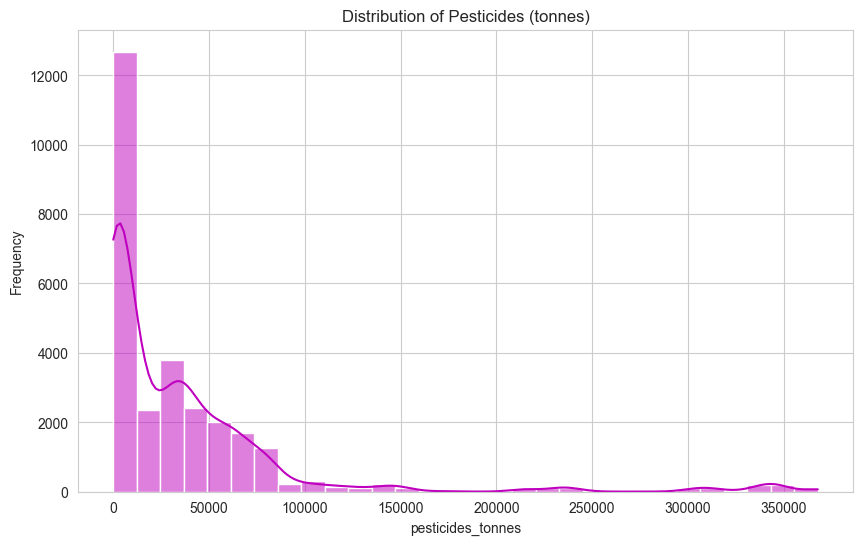

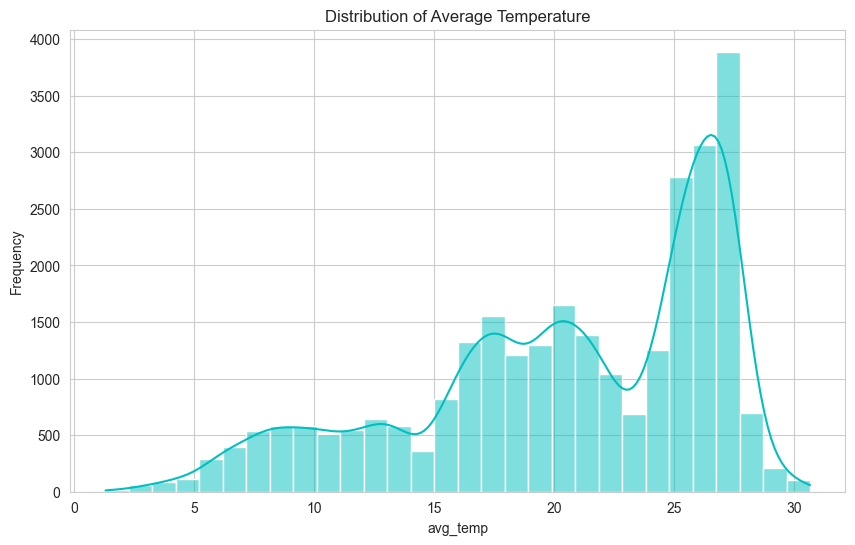

In [5]:
def setup_plot_style():
    """Set up the plotting style"""
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = [10, 6]

def plot_area_distribution(df):
    """Plot top 10 areas distribution"""
    plt.figure()
    area_counts = df['Area'].value_counts().head(10)
    sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
    plt.title('Top 10 Areas')
    plt.xlabel('Count')
    plt.ylabel('Area')
    plt.show()

def plot_item_distribution(df):
    """Plot items distribution"""
    plt.figure()
    item_counts = df['Item'].value_counts()
    sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
    plt.title('Items Count')
    plt.xlabel('Count')
    plt.ylabel('Item')
    plt.show()

def plot_yearly_entries(df):
    """Plot entries over years"""
    plt.figure()
    year_counts = df['Year'].value_counts().sort_index()
    sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
    plt.title('Entries Over Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Entries')
    plt.show()

def plot_numerical_distributions(df):
    """Plot distributions of numerical features"""
    numerical_cols = {
        'hg/ha_yield': ('g', 'Distribution of hg/ha_yield'),
        'average_rain_fall_mm_per_year': ('r', 'Distribution of Average Rainfall (mm/year)'),
        'pesticides_tonnes': ('m', 'Distribution of Pesticides (tonnes)'),
        'avg_temp': ('c', 'Distribution of Average Temperature')
    }
    
    for col, (color, title) in numerical_cols.items():
        plt.figure()
        sns.histplot(df[col], bins=30, kde=True, color=color)
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Create all visualizations
setup_plot_style()
plot_area_distribution(data)
plot_item_distribution(data)
plot_yearly_entries(data)
plot_numerical_distributions(data)

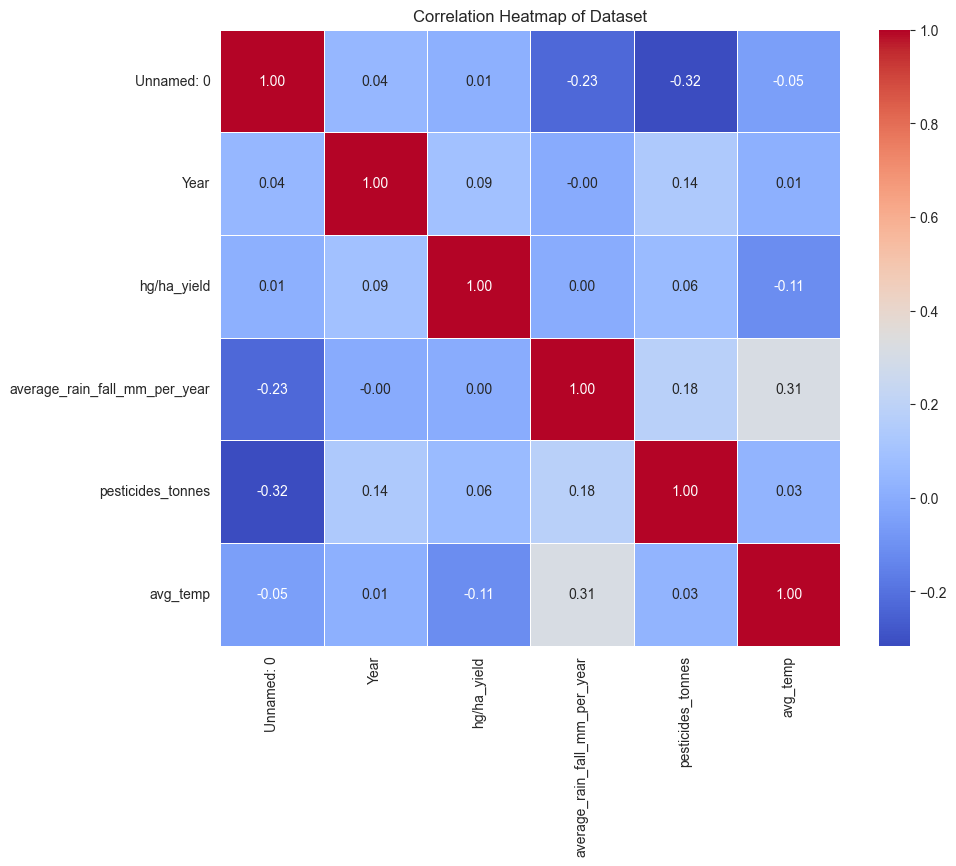

In [6]:
def plot_correlation_matrix(df):
    """
    Create and plot correlation matrix for numerical columns
    Args:
        df (pd.DataFrame): Input dataframe
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr(numeric_only=True)
    
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Dataset')
    plt.show()

# Plot correlation matrix
plot_correlation_matrix(data)

RMSE XGBoost: 15710.23
Acc XGBoost: 0.80
RMSE RF: 14006.28
Acc RF: 0.82


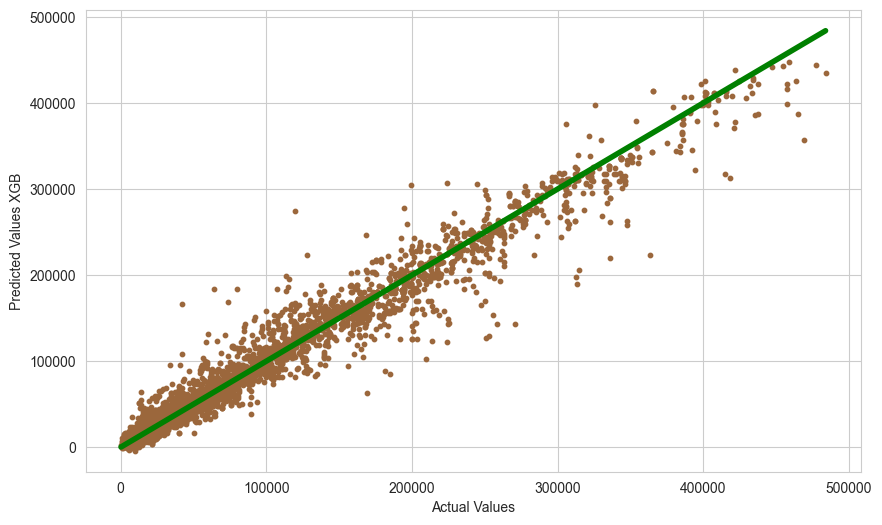

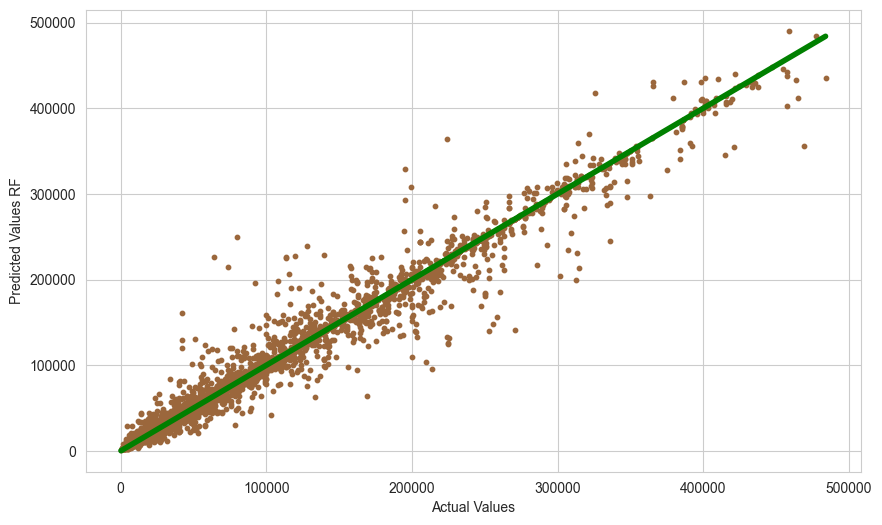

In [7]:
def preprocess_data(df):
    """
    Preprocess the data for model training
    Args:
        df (pd.DataFrame): Input dataframe
    Returns:
        tuple: X (features) and y (target) arrays, and label encoders
    """
    # Rename columns for clarity
    data_renamed = df.rename(columns={
        "hg/ha_yield": "Yield",
        "average_rain_fall_mm_per_year": "Rainfall",
        "pesticides_tonnes": "Pesticides",
        "avg_temp": "Avg_Temp"
    })
    
    # Drop the index column if it's not needed
    data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])
    
    # Encode categorical variables
    le_country = LabelEncoder()
    le_item = LabelEncoder()
    data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
    data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])
    
    # Define features and target variable
    X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
    y = data_cleaned['Yield']
    
    return X, y, (le_country, le_item)

def train_models(X, y, random_state=42):
    """
    Train XGBoost and Random Forest models
    Args:
        X: Features array
        y: Target array
        random_state: Random seed for reproducibility
    Returns:
        tuple: Trained models and their predictions
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Train XGBoost
    xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    xgb_model.fit(X_train, y_train)
    
    # Train Random Forest
    rf_model = RandomForestRegressor(random_state=random_state)
    rf_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_xgb = xgb_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_test)
    
    return (xgb_model, rf_model), (X_test, y_test, y_pred_xgb, y_pred_rf)

def evaluate_models(test_data):
    """
    Evaluate model performance
    Args:
        test_data: Tuple containing test set and predictions
    """
    X_test, y_test, y_pred_xgb, y_pred_rf = test_data
    
    # Calculate metrics
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    accuracy_xgb = 1 - (rmse_xgb / np.mean(y_test))
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    accuracy_rf = 1 - (rmse_rf / np.mean(y_test))
    
    print(f"RMSE XGBoost: {rmse_xgb:.2f}")
    print(f"Acc XGBoost: {accuracy_xgb:.2f}")
    print(f"RMSE RF: {rmse_rf:.2f}")
    print(f"Acc RF: {accuracy_rf:.2f}")

def plot_predictions(test_data):
    """
    Plot actual vs predicted values
    Args:
        test_data: Tuple containing test set and predictions
    """
    X_test, y_test, y_pred_xgb, y_pred_rf = test_data
    
    # XGBoost plot
    plt.figure()
    plt.scatter(y_test, y_pred_xgb, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values XGB')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.show()
    
    # Random Forest plot
    plt.figure()
    plt.scatter(y_test, y_pred_rf, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values RF')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.show()

# Process the data and train models
X, y, encoders = preprocess_data(data)
models, test_data = train_models(X, y)
xgb_model, rf_model = models

# Evaluate and visualize results
evaluate_models(test_data)
plot_predictions(test_data)

In [8]:
def save_model(model, file_path):
    """
    Save the trained model to a file
    Args:
        model: Trained model to save
        file_path (str): Path where to save the model
    """
    try:
        joblib.dump(model, file_path)
        print(f"Model successfully saved to {file_path}")
    except Exception as e:
        print(f"Error saving model: {str(e)}")

# Save the XGBoost model
save_model(xgb_model, "crop_yield_model.pkl")

Model successfully saved to crop_yield_model.pkl


We can see the XGBoost has a accuracy of 96% and Random Forest has an accuracy of 97%